<a href="https://colab.research.google.com/github/EVARIST-DEV/EVARIST-DEV.github.io/blob/main/trading_BTCUSD_signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!import mplfinance as mpf
!pip install plotly
!pip install finplot
import warnings
warnings.filterwarnings('ignore')

/bin/bash: line 1: import: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.0/961.0 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 MB 10.1 MB/s eta 0:00:00


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [5]:
# Retrieve two weeks of Bitcoin to USD exchange rates with a 1 hour interval and save the dataframe to a variable.
BTC_USD = yf.download("BTC-USD", start='2023-11-01', end='2023-12-15', interval='1h')

[*********************100%%**********************]  1 of 1 completed


In [6]:
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-11-01 00:00:00+00:00,34657.273438,34666.660156,34524.503906,34526.164062,34526.164062,0
2023-11-01 01:00:00+00:00,34524.902344,34573.906250,34502.972656,34513.257812,34513.257812,0
2023-11-01 02:00:00+00:00,34512.476562,34512.476562,34451.750000,34468.601562,34468.601562,0
2023-11-01 03:00:00+00:00,34469.628906,34483.433594,34424.875000,34450.382812,34450.382812,0
2023-11-01 04:00:00+00:00,34443.531250,34478.128906,34407.695312,34437.933594,34437.933594,177147904


In [7]:
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-12-14 06:00:00+00:00,42803.425781,43098.722656,42792.890625,42910.003906,42910.003906,279291904
2023-12-14 07:00:00+00:00,42904.218750,42939.386719,42791.902344,42909.242188,42909.242188,57761792
2023-12-14 08:00:00+00:00,42913.515625,42983.968750,42795.730469,42811.843750,42811.843750,136558592
2023-12-14 09:00:00+00:00,42791.050781,42917.363281,42727.554688,42917.363281,42917.363281,146673664
2023-12-14 10:00:00+00:00,42914.070312,42944.343750,42824.718750,42918.273438,42918.273438,138362880


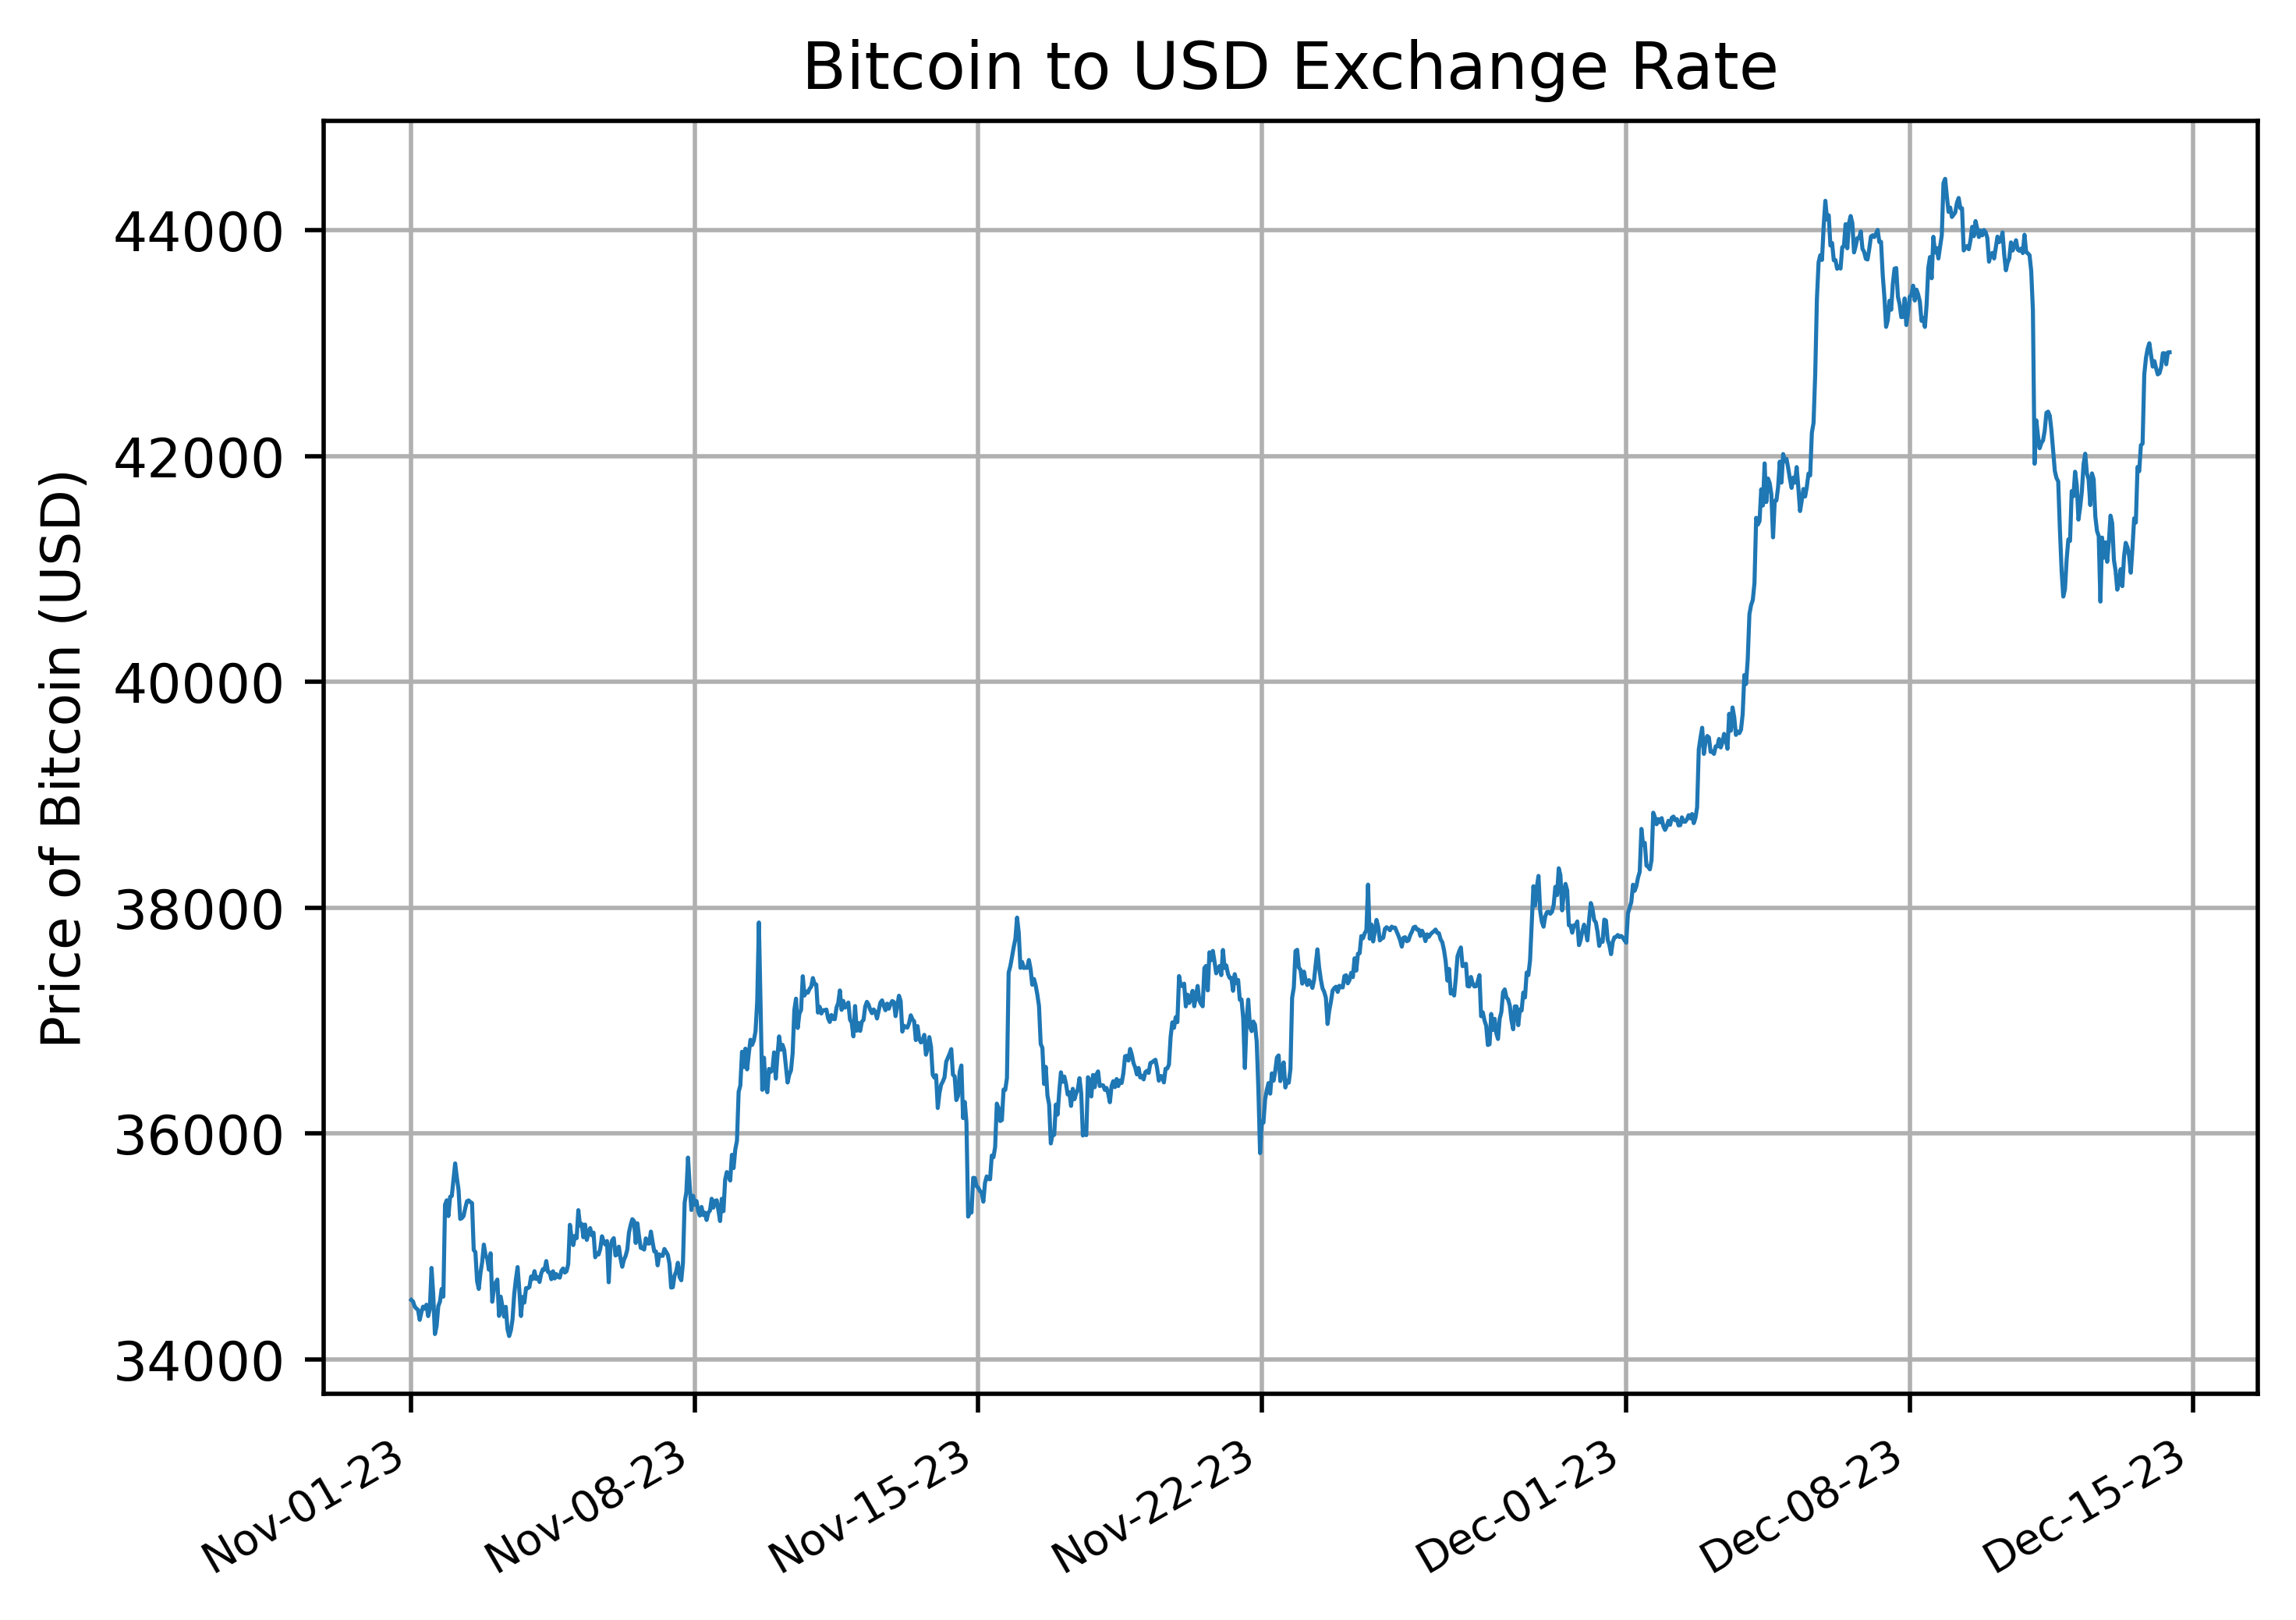

In [8]:
fig, ax = plt.subplots(dpi=500)

#fplt.candlestick_ochl(df[['Open', 'Close', 'High', 'Low']])

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

In [9]:
#import finplot as fplt
#import yfinance
#df = yf.download("BTC-USD", start='2023-01-01', end='2023-10-22', interval='1d')
#fplt.candlestick_ochl(df[['Open', 'Close', 'High', 'Low']])
#fplt.show()

In [10]:
# Compute a 30-day Simple Moving Average with pandas
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

In [11]:
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

In [12]:
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_30,SMA_9
Datetime,,,,,,,,
2023-12-14 06:00:00+00:00,42803.425781,43098.722656,42792.890625,42910.003906,42910.003906,279291904,41907.929688,42828.446615
2023-12-14 07:00:00+00:00,42904.218750,42939.386719,42791.902344,42909.242188,42909.242188,57761792,41968.880990,42818.538194
2023-12-14 08:00:00+00:00,42913.515625,42983.968750,42795.730469,42811.843750,42811.843750,136558592,42029.811198,42809.152344
2023-12-14 09:00:00+00:00,42791.050781,42917.363281,42727.554688,42917.363281,42917.363281,146673664,42099.861458,42823.151042
2023-12-14 10:00:00+00:00,42914.070312,42944.343750,42824.718750,42918.273438,42918.273438,138362880,42167.710286,42831.842882


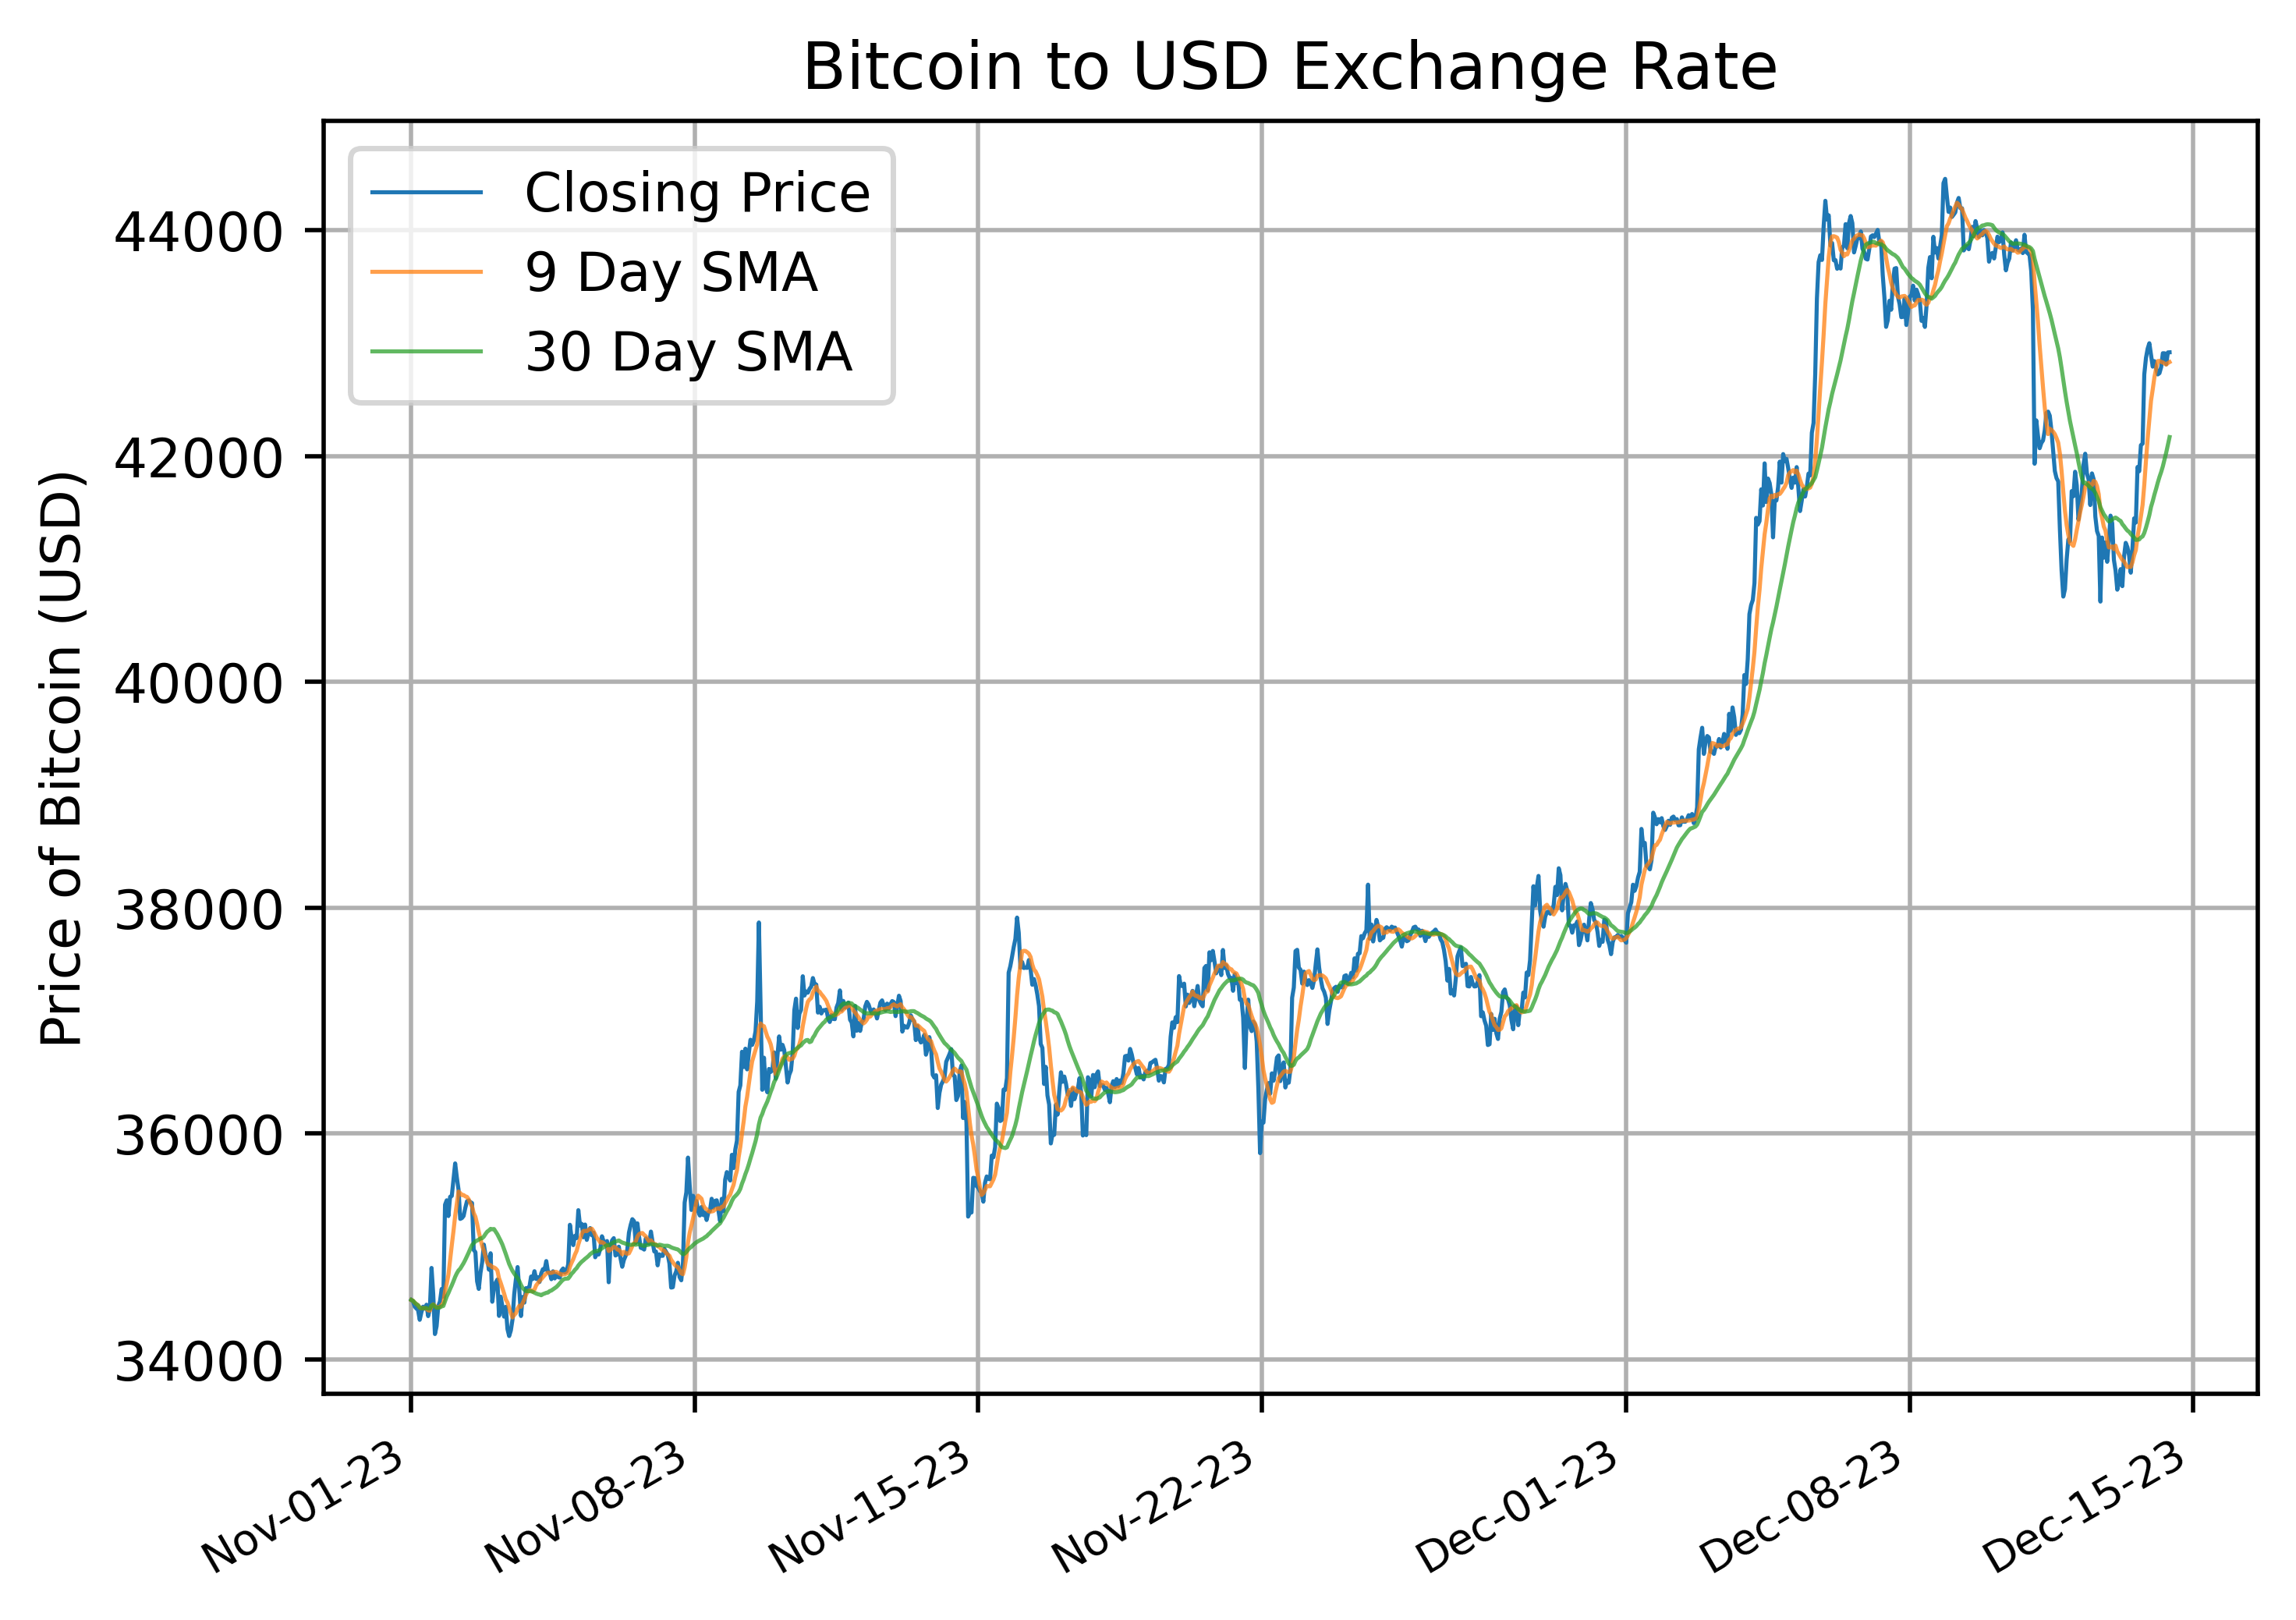

In [13]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

In [14]:
# Creating a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

In [15]:
# Create a new column populated with zeros(Signal that is populated everywhere with zeros, except for a one wherever the two Moving Averages cross.)
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)

In [16]:
trade_signals['Position'] = trade_signals['Signal'].diff()

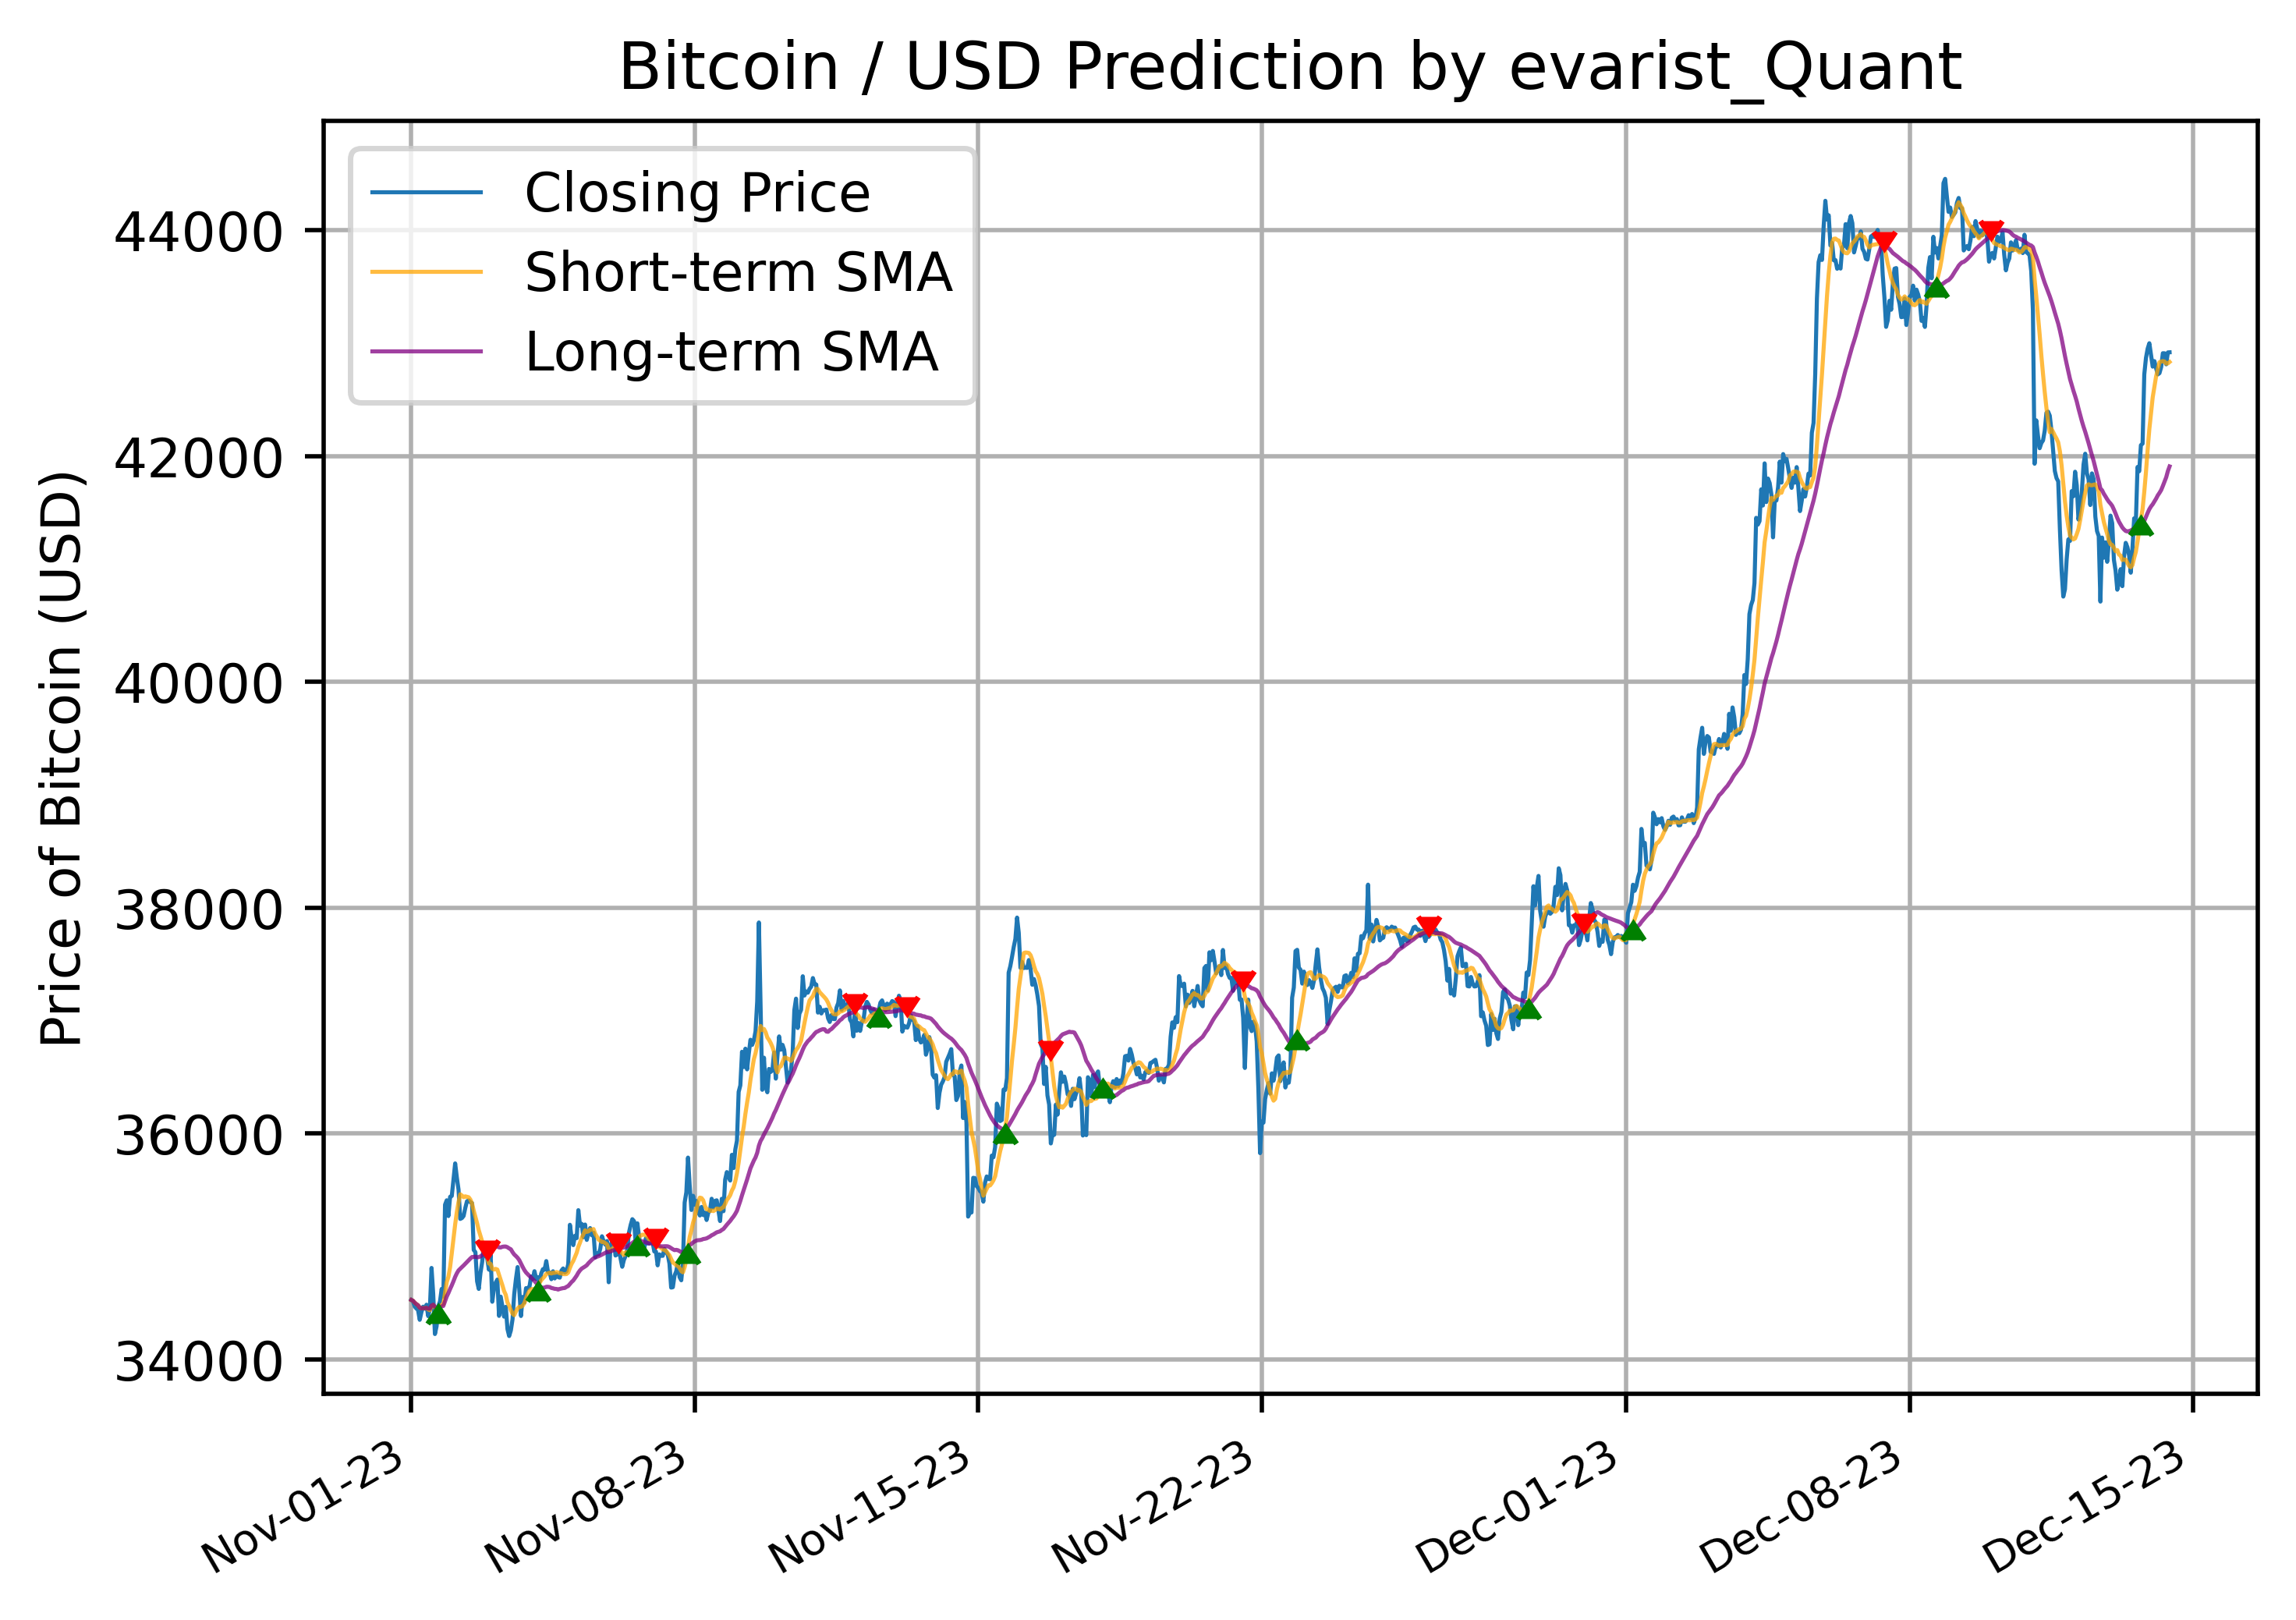

In [17]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin / USD Prediction by evarist_Quant')
ax.grid() # adding a grid
ax.legend() # adding a legend
# Displaying the price chart
plt.show()

In [18]:
#testing our strategy
# Define how much money you will start with (in USD)
initial_balance = 1000 #hundred USD

# Create dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Add column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1) # Current closing price / yesterday's closing price

In [19]:

# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product

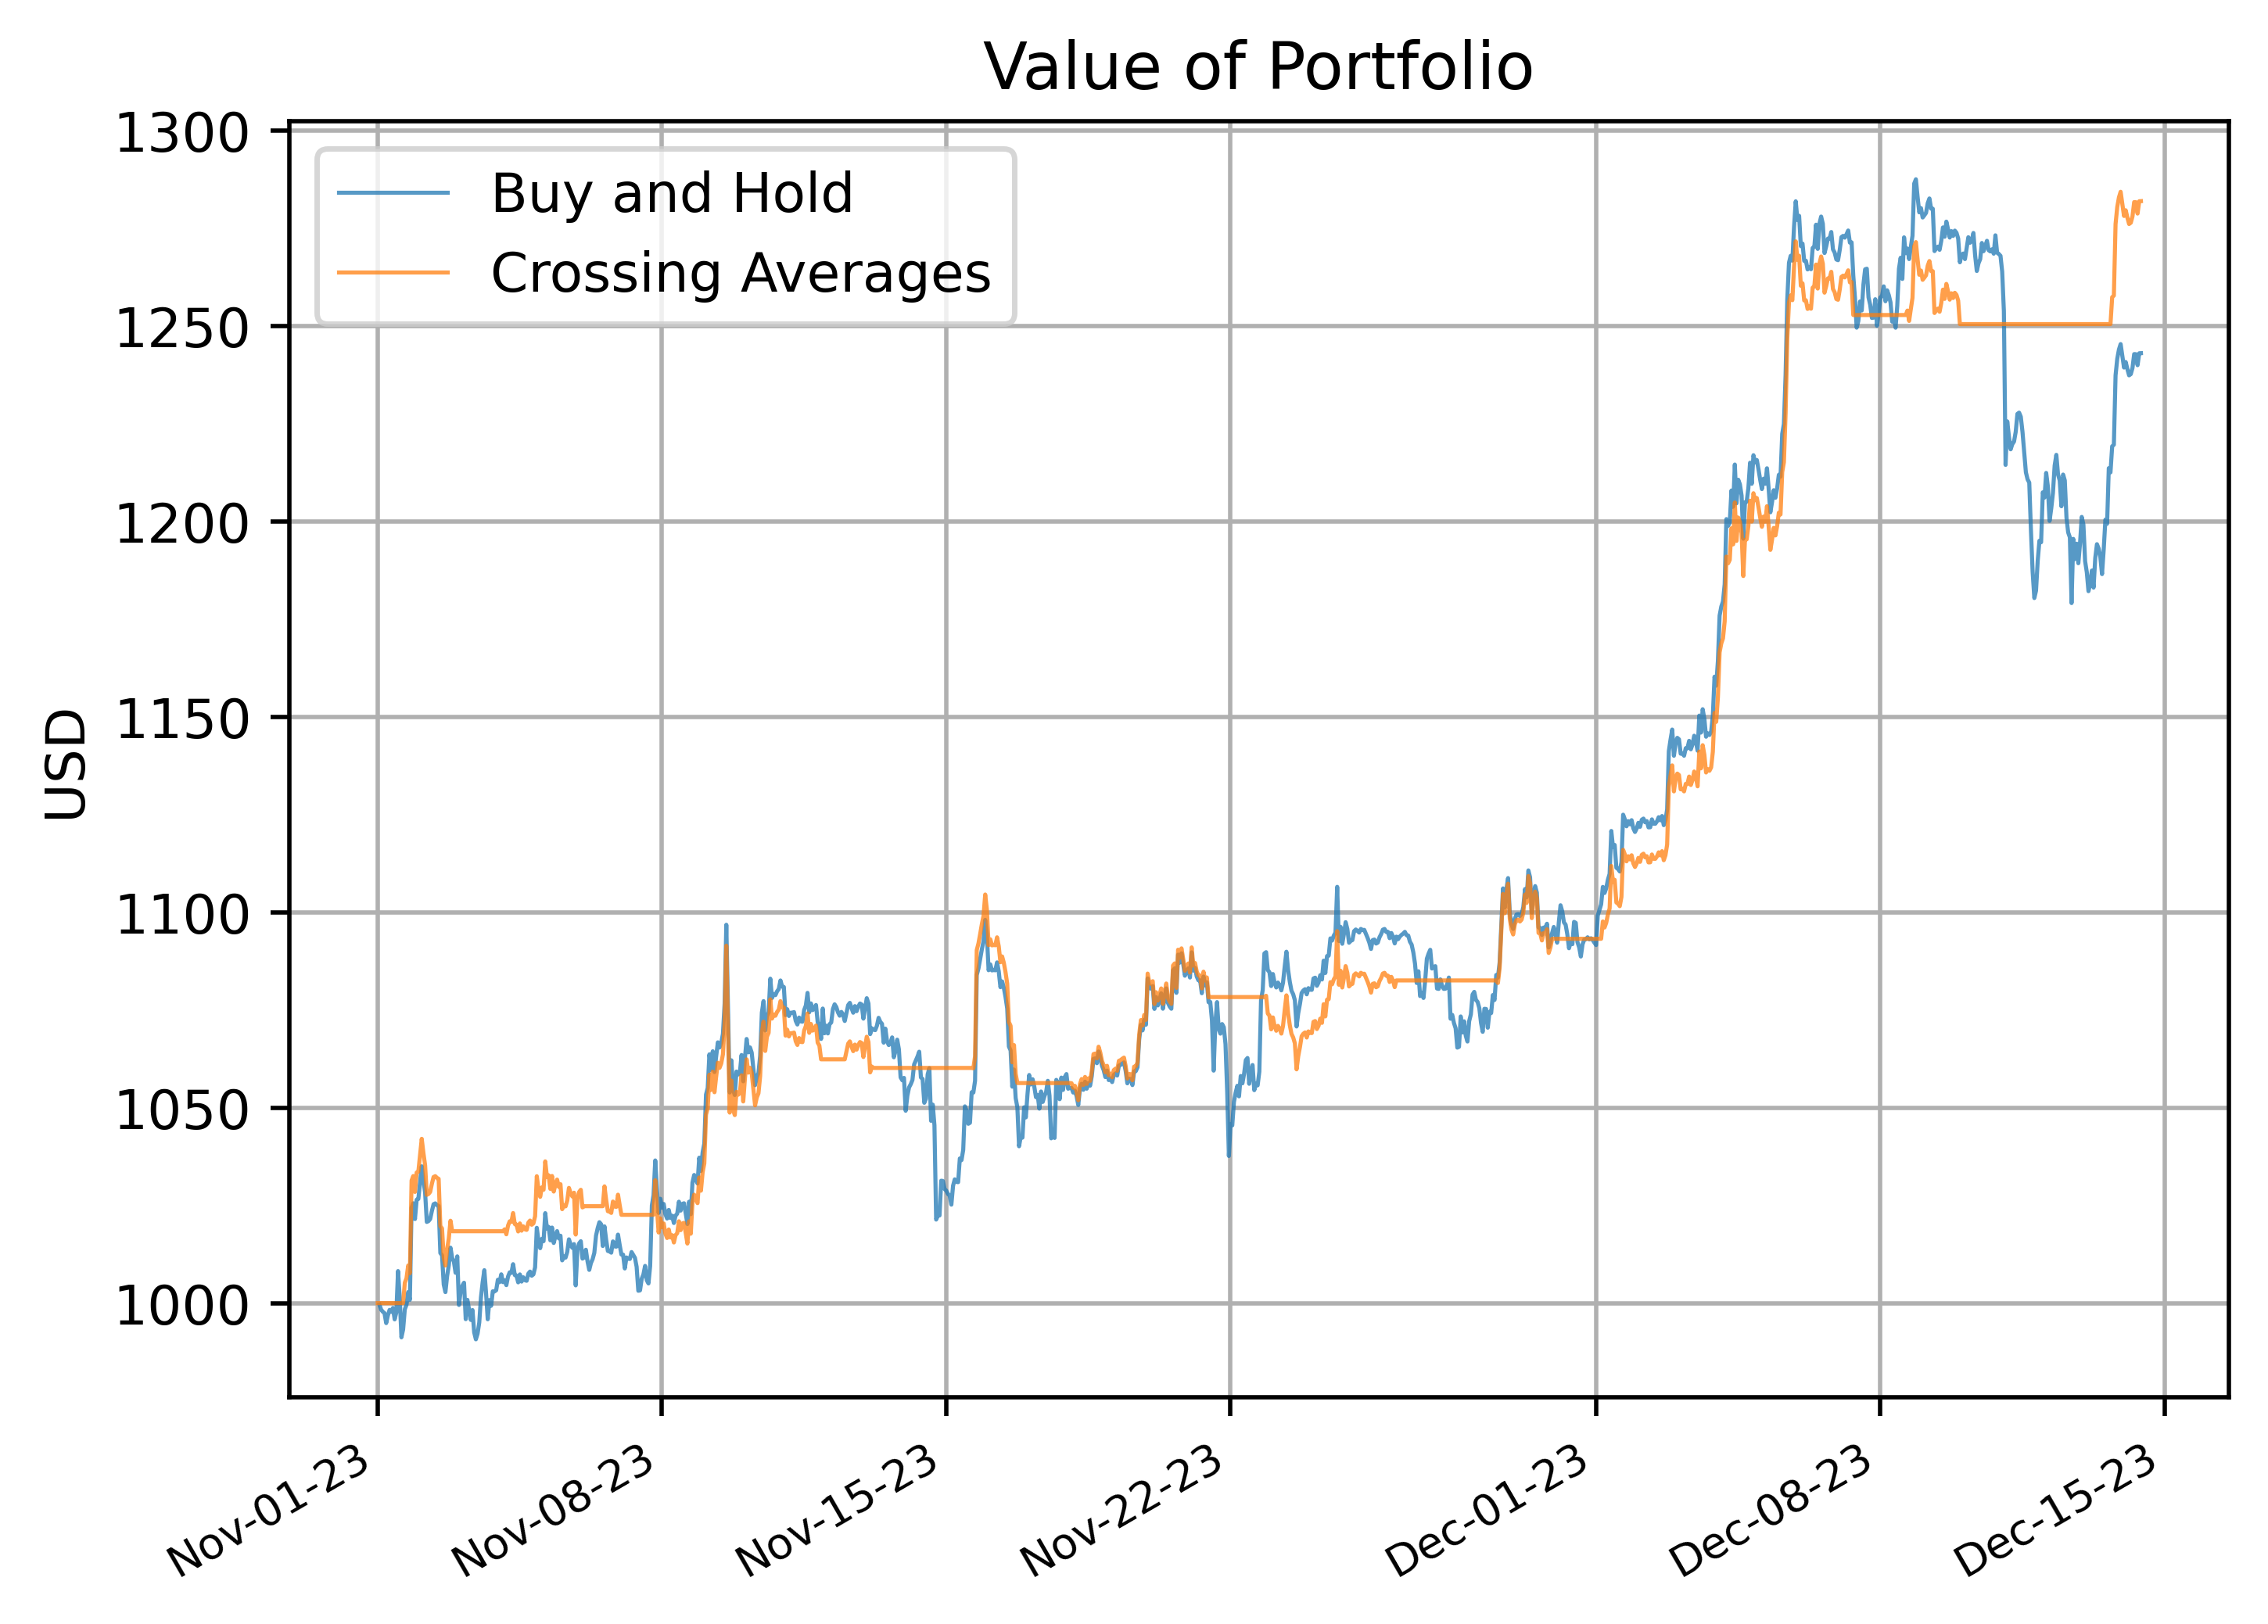

In [20]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

In [21]:
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_30,SMA_9
Datetime,,,,,,,,
2023-11-01 00:00:00+00:00,34657.273438,34666.660156,34524.503906,34526.164062,34526.164062,0,34526.164062,34526.164062
2023-11-01 01:00:00+00:00,34524.902344,34573.906250,34502.972656,34513.257812,34513.257812,0,34519.710938,34519.710938
2023-11-01 02:00:00+00:00,34512.476562,34512.476562,34451.750000,34468.601562,34468.601562,0,34502.674479,34502.674479
2023-11-01 03:00:00+00:00,34469.628906,34483.433594,34424.875000,34450.382812,34450.382812,0,34489.601562,34489.601562
2023-11-01 04:00:00+00:00,34443.531250,34478.128906,34407.695312,34437.933594,34437.933594,177147904,34479.267969,34479.267969
